## 데이터 전처리 코드

In [46]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
history = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\냉각수_History.csv")
error = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\냉각수 고장.csv")
columns_to_drop = ['dtTTime','DBV','PT','A2','ERROR_TYPE','PV','DCH','DV','MODEL']
error.drop(columns_to_drop, axis=1, inplace=True)
# 데이터 정보 확인
print('History 데이터 프레임 정보\n데이터프레임 형태 :', history.shape)
print('---------------------')
print('Error 데이터 프레임 정보\n데이터프레임 형태 :', error.shape)
history.head(3)

History 데이터 프레임 정보
데이터프레임 형태 : (537334, 34)
---------------------
Error 데이터 프레임 정보
데이터프레임 형태 : (91236, 9)


,Unnamed: 0,SN,ATime,TTime,E_RPM,ET1_1,ET1_2,EFLP1_1,EFLP1_2,IC1_1,...,C_REGEN,EEC1_1,FSPTCU_1,PTO_LAMP,PTOT,DRT,MTM_SHIFT,STM_SHIFT,VSPEED,VUDT
0,9404,T001210400190019,2024-01-03 11:25:16.631,20240103:110910,2200.46,80,-273.0,0,0,0,...,0,-125,0,0,0,0,0,0,0.51,1
1,9405,T001210400190019,2024-01-03 11:25:18.885,20240103:111010,2200.21,80,-273.0,0,0,0,...,0,-70,0,1,0,0,0,0,0.35,2
2,9406,T001210400190019,2024-01-03 11:25:21.427,20240103:111110,2200.40,80,-273.0,0,0,0,...,0,-36,0,0,0,0,2,0,0.25,3


In [47]:
error.head()

,Unnamed: 0,SN,ATime,ECount,MN,T2,TTime,State,PN
0,423,T001210400190019,2024-01-03 11:13:08.387,36,TEST231228,Error,20240103:110915,1,냉각수 레벨 낮음 경고
1,3514,T001210400190019,2024-01-03 11:16:21.408,36,TEST231228,Error,20240103:111043,0,냉각수 레벨 낮음 경고
2,3515,T001210400190019,2024-01-03 11:16:21.408,36,TEST231228,Error,20240103:111045,1,냉각수 레벨 낮음 경고
3,38244,T001215100020002,2024-06-18 19:01:30.019,1,S130SX00410,Error,20240618:190120,1,냉각수 온도 높음
4,38246,T001215100020002,2024-06-18 19:01:40.224,1,S130SX00410,Error,20240618:190120,2,냉각수 온도 높음


In [53]:
# 저장할 폴더 경로 설정
output_dir = r'C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history'

# 폴더가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 각 SN별로 파일을 저장하는 함수 정의
def save_sn_group(sn, group_df):
    file_name = f"{sn}_history.csv"
    file_path = os.path.join(output_dir, file_name)
    group_df.to_csv(file_path, index=False)
    print(f"SN {sn} 데이터 저장 완료: {file_path}")

# SN별로 그룹화 및 저장
sn_list = history['SN'].unique().compute()

for sn in sn_list:
    # 각 SN별 그룹을 가져오기
    group_df = history[history['SN'] == sn].compute()
    save_sn_group(sn, group_df)

SN T001210400190019 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001210400190019_history.csv
SN T001215100020002 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100020002_history.csv
SN T001215100300030 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100300030_history.csv
SN T001215100310031 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100310031_history.csv
SN T001215100340034 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100340034_history.csv
SN T001215100400040 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100400040_history.csv
SN T001215100510051 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100510051_history.csv
SN T001215100540054 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100540054_history.csv
SN T001215100550055 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T00

In [54]:
# 저장할 폴더 경로 설정
output_dir = r'C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error'

# 폴더가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 각 SN별로 파일을 저장하는 함수 정의
def save_sn_group(sn, group_df):
    file_name = f"{sn}_error.csv"
    file_path = os.path.join(output_dir, file_name)
    group_df.to_csv(file_path, index=False)
    print(f"SN {sn} 데이터 저장 완료: {file_path}")

# SN별로 그룹화 및 저장
sn_list = error['SN'].unique().compute()

for sn in sn_list:
    # 각 SN별 그룹을 가져오기
    group_df = error[error['SN'] == sn].compute()
    save_sn_group(sn, group_df)

SN T001210400190019 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001210400190019_error.csv
SN T001215100020002 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100020002_error.csv
SN T001215100300030 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100300030_error.csv
SN T001215100310031 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100310031_error.csv
SN T001215100340034 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100340034_error.csv
SN T001215100370037 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100370037_error.csv
SN T001215100400040 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100400040_error.csv
SN T001215100510051 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100510051_error.csv
SN T001215100540054 데이터 저장 완료: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100540054_error.csv
SN T001215

In [76]:
import pandas as pd
import os

# 파일 경로 설정
history_file_path = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history\T001215100310031_history.csv"
error_file_path = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error\T001215100310031_error.csv"
merge_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\merge"

# merge 디렉터리가 없으면 생성
if not os.path.exists(merge_dir):
    os.makedirs(merge_dir)

# CSV 파일 읽기
try:
    history_df = pd.read_csv(history_file_path, encoding='EUC-KR')
    error_df = pd.read_csv(error_file_path)
    
    # 'SN' 칼럼이 있는지 확인
    if 'SN' not in history_df.columns or 'SN' not in error_df.columns:
        raise ValueError("One of the files is missing the 'SN' column")
    
    # 데이터 병합
    merged_df = pd.merge(history_df, error_df, on='SN', how='inner')
    
    # 'TTime' 칼럼이 있는지 확인
    if 'ATime' not in merged_df.columns:
        raise ValueError("The 'ATime' column is missing in the merged data")
    
    # TTime 칼럼 기준으로 정렬
    merged_df.sort_values(by='ATime', inplace=True)
    
    # 파일명 생성 (SN 칼럼의 첫 번째 값 사용)
    sn_value = history_df['SN'].iloc[0]
    merge_file_path = os.path.join(merge_dir, f"{sn_value}.csv")
    
    # 결과를 CSV로 저장
    merged_df.to_csv(merge_file_path, index=False)
    print(f"파일 {merge_file_path} 저장 완료")
    
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except ValueError as e:
    print(f"값 오류: {e}")
except Exception as e:
    print(f"예상치 못한 오류 발생: {e}")


예상치 못한 오류 발생: Unable to allocate 176. MiB for an array with shape (6, 3839654) and data type object


#### History , Error 퓨징 완료

In [ ]:
import pandas as pd
import os

# 파일 경로 설정
history_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\history"
error_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\error"
merge_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\merge"

# 폴더가 존재하지 않으면 생성
if not os.path.exists(merge_dir):
    os.makedirs(merge_dir)

# history와 error 디렉토리에서 파일 목록 가져오기
history_files = [f for f in os.listdir(history_dir) if f.endswith('.csv')]
error_files = [f for f in os.listdir(error_dir) if f.endswith('.csv')]

# 파일 이름을 기반으로 파일 병합
for file_name in history_files:
    # 파일명 추출 (split 기준 0번째 값)
    base_name = file_name.split('_')[0]

    # 경로 설정
    history_file_path = os.path.join(history_dir, file_name)
    error_file_path = os.path.join(error_dir, f"{base_name}_error.csv")
    
    if not os.path.exists(error_file_path):
        print(f"Error file for {file_name} not found.")
        continue

    # 파일 읽기
    try:
        history_df = pd.read_csv(history_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        history_df = pd.read_csv(history_file_path, encoding='euc-kr')

    try:
        error_df = pd.read_csv(error_file_path, encoding='utf-8')
    except UnicodeDecodeError:
        error_df = pd.read_csv(error_file_path, encoding='euc-kr')

    # 데이터 병합
    combined_df = pd.concat([history_df, error_df], axis=0, ignore_index=True)

    # TTime 칼럼 기준으로 정렬
    if 'TTime' in combined_df.columns:
        combined_df = combined_df.sort_values(by='TTime')
    else:
        print(f"TTime 칼럼이 {file_name} 데이터프레임에 없습니다.")

    # TTime 칼럼의 ':' 기준 0번째 값을 추출하여 새로운 'TTime_group' 칼럼 생성
    combined_df['TTime_group'] = combined_df['TTime'].apply(lambda x: x.split(':')[0])

    # 'ECount' 칼럼이 비어있는지 확인하여 'Target' 칼럼 생성
    combined_df['Target'] = combined_df.groupby('TTime_group')['ECount'].transform(lambda x: 1 if x.notna().any() else 0)

    # 'Target' 칼럼이 1로 채워진 경우 'ECount' 칼럼에 값이 없는 행에만 1을 할당
    combined_df['Target'] = combined_df.apply(lambda row: 1 if pd.isna(row['ECount']) and row['Target'] == 1 else 0, axis=1)

    # 'E_RPM' 칼럼이 비어있는 경우를 가진 행 제거
    if 'E_RPM' in combined_df.columns:
        combined_df = combined_df.dropna(subset=['E_RPM'])

    # 불필요한 칼럼 제거
    columns_to_remove = ['A2', 'DBV', 'ECount', 'MN', 'MODEL', 'PT', 'T2', 'dtTTime', 'State', 'ERROR_TYPE', 'PN', 'PV', 'DCH', 'DV']
    combined_df = combined_df.drop(columns=[col for col in columns_to_remove if col in combined_df.columns])

    # 파일 저장
    merged_file_path = os.path.join(merge_dir, f"{base_name}.csv")
    try:
        combined_df.to_csv(merged_file_path, index=False, encoding='utf-8')
        print(f"병합된 데이터가 '{merged_file_path}'에 저장되었습니다.")
    except PermissionError:
        print(f"파일 저장 중 권한 오류가 발생했습니다. 파일 '{merged_file_path}'가 열려 있는지 확인하세요.")
    except Exception as e:
        print(f"파일 저장 중 오류가 발생했습니다: {e}")

#### 하나의 파일로 합치기

In [56]:
import os
import pandas as pd

# 데이터 파일이 위치한 디렉토리와 저장할 디렉토리 설정
input_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\merge"
output_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
output_file = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv"

# 입력 디렉토리의 모든 CSV 파일을 읽어서 하나의 DataFrame으로 결합
all_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]
combined_df = pd.concat([pd.read_csv(os.path.join(input_dir, file), encoding='euc-kr') for file in all_files], ignore_index=True)

# 결과를 CSV 파일로 저장
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

combined_df.to_csv(output_file, index=False, encoding='euc-kr')

print(f"파일이 성공적으로 저장되었습니다: {output_file}")


파일이 성공적으로 저장되었습니다: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv


#### 시각화

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 파일 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\merge\T002230602180218.csv", encoding='euc-kr')

# 데이터 확인
print(db.head())
print(db.info())

# 결측값 처리 (필요시)
db = db.dropna(subset=['E_RPM', 'ET1_1'])

# 색상 정의
colors = {0: 'blue', 1: 'red'}
labels = {0: '정상', 1: '고장'}

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\01.시각화"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 1. 엔진 회전수와 냉각수 온도의 관계 시각화
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='E_RPM', y='ET1_1', data=db, hue='Target', palette=colors, alpha=0.7)
plt.title('엔진 회전수 vs 냉각수 온도')
plt.xlabel('엔진 회전수 (E_RPM)')
plt.ylabel('냉각수 온도 (ET1_1)')
# 범례 설정
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[key], markersize=10, label=labels[key]) for key in colors]
plt.legend(title='고장 상태', handles=handles)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, '엔진 회전수 vs 냉각수 온도.png'))
plt.close()

# 2. 고장 상태와 정상 상태에서의 냉각수 온도 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=db, x='ET1_1', hue='Target', multiple='stack', palette=colors, bins=30)
plt.title('고장 상태와 정상 상태에서의 냉각수 온도 분포')
plt.xlabel('냉각수 온도 (ET1_1)')
plt.ylabel('빈도')
plt.legend(title='고장 상태', labels=[labels[0], labels[1]])
plt.tight_layout()
plt.savefig(os.path.join(save_dir, '고장 상태와 정상 상태에서의 냉각수 온도 분포.png'))
plt.close()

# 3. 상관 행렬 시각화
plt.figure(figsize=(12, 10))
corr = db[['E_RPM', 'ET1_1', 'Target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관 행렬')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, '상관 행렬.png'))
plt.close()

print("시각화가 저장되었습니다.")

   Unnamed: 0                SN                    ATime            TTime  \
0     1704804  T002230602180218  2024-01-02 12:11:19.004  20240102:121104   
1     1704805  T002230602180218  2024-01-02 12:13:14.426  20240102:121259   
2     1704806  T002230602180218  2024-01-02 12:14:16.296  20240102:121400   
3     1704807  T002230602180218  2024-01-02 12:15:14.478  20240102:121500   
4     1704808  T002230602180218  2024-01-03 08:14:25.311  20240103:081411   

    E_RPM  ET1_1    ET1_2  EFLP1_1  EFLP1_2  IC1_1  ...  FSPTCU_1  PTO_LAMP  \
0  509.70    1.0  1774.96    392.0    247.0   94.0  ...       1.0       0.0   
1  654.51    6.0  1774.96    310.0    318.0  100.0  ...       1.0       0.0   
2  828.98   11.0  1774.96    430.0    393.0   96.0  ...       1.0       0.0   
3  936.35   15.0  1774.96    436.0    448.0  102.0  ...       1.0       0.0   
4  771.55    7.0  1774.96    326.0    287.0   94.0  ...       1.0       0.0   

   PTOT  DRT  MTM_SHIFT  STM_SHIFT  VSPEED  VUDT  TTime_group 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 데이터 파일 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv", encoding='utf-8-sig')

# 문자열 칼럼을 제외한 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# 수치형 데이터의 상관 행렬 계산
corr = numeric_db.corr()

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우, 맑은 고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리

# 고급스러운 디자인 설정
plt.figure(figsize=(25, 21))
sns.set(style='whitegrid', palette='muted')

# 히트맵 시각화
heatmap = sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, linecolor='gray', cbar_kws={'shrink': .8}, annot_kws={"size": 13})

# 제목 및 라벨 설정
plt.title('수치형 데이터의 상관 행렬', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)

# 저장 경로 수정
file_path = os.path.join(save_dir, 'Numeric_Data_Correlation_Heatmap.png')
plt.tight_layout()
plt.savefig(file_path, dpi=500)
plt.close()

print("수치형 데이터의 상관 행렬 히트맵이 저장되었습니다.")


c:\Users\sony6\.conda\envs\tf\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
c:\Users\sony6\.conda\envs\tf\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
c:\Users\sony6\.conda\envs\tf\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
c:\Users\sony6\.conda\envs\tf\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
c:\Users\sony6\.conda\envs\tf\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.draw()
c:\Users\sony6\.conda\envs\tf\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.dra

수치형 데이터의 상관 행렬 히트맵이 저장되었습니다.


<Figure size 1200x1000 with 0 Axes>

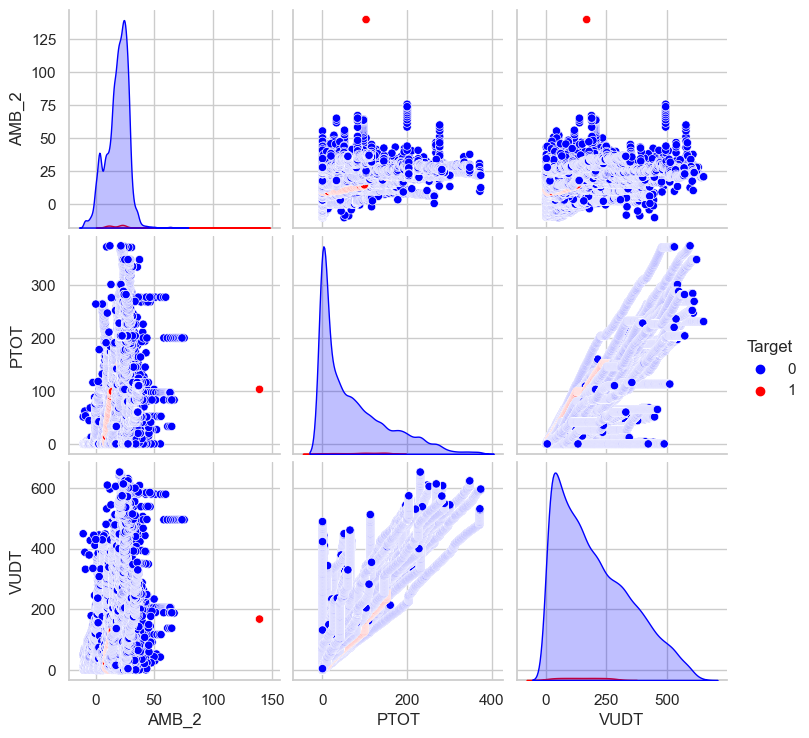

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 파일 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\merge\T002230602180218.csv", encoding='euc-kr')

# 'TTime_group'을 문자열로 변환하여 날짜 형식으로 처리
db['TTime_group'] = pd.to_datetime(db['TTime_group'].astype(str), format='%Y%m%d', errors='coerce')

# 결측값 처리 (날짜 형식으로 변환된 칼럼을 포함한 필수 칼럼만 선택)
db = db.dropna(subset=['TTime_group', 'AMB_2', 'PTOT', 'VUDT', 'Target'])

# 색상 정의
colors = {0: 'blue', 1: 'red'}

# 비선형 관계 탐색
plt.figure(figsize=(12, 10))
sns.pairplot(db[['TTime_group', 'AMB_2', 'PTOT', 'VUDT', 'Target']], hue='Target', palette=colors)
plt.show()


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 한글 폰트 설정 (시스템에 설치된 한글 폰트로 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우, 'Malgun Gothic' 또는 '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리

# 데이터 파일 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\merge\T002230602180218.csv", encoding='euc-kr')
# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 문자열 칼럼을 제외한 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# 상관 행렬 계산
corr = numeric_db.corr()

# 상관 계수가 0.7 이상인 변수 쌍 찾기
strong_corr = corr[(corr >= 0.7) & (corr != 1.0)].stack().reset_index()
strong_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# 중복 제거
strong_corr = strong_corr.drop_duplicates()

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\01.시각화"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 상관 계수가 0.7 이상인 변수 쌍에 대해 선형 산점도 그리기 및 저장
for index, row in strong_corr.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    
    # 선형 산점도 그리기
    sns.lmplot(x=feature1, y=feature2, data=db, hue='Target', aspect=2, height=8, scatter_kws={'s': 50, 'alpha':0.5}, line_kws={'linewidth':2})
    plt.title(f'Scatter Plot with Linear Fit: {feature1} vs {feature2}', fontsize=16)
    plt.xlabel(feature1, fontsize=14)
    plt.ylabel(feature2, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # 레이아웃 조정 (그래프가 잘리지 않도록)
    plt.tight_layout()
    
    # 파일명 설정 및 저장
    filename = f"{feature1}_vs_{feature2}_scatter.png"
    plt.savefig(os.path.join(save_dir, filename), dpi=300)
    plt.close()

print("선형 산점도 그래프가 저장되었습니다.")

선형 산점도 그래프가 저장되었습니다.


#### 선형 그래프

##### 밀도 추정 함수

In [61]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv", encoding='euc-kr')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 'Target' 칼럼을 범례용으로 변환
db['Target_Label'] = db['Target'].map({0: '정상', 1: '고장'})

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# 상관 행렬 계산
corr = numeric_db.corr()

# 상관 계수가 1.0이 아닌 0.7 이상 또는 -0.7 이하인 변수 쌍 찾기
strong_corr = corr[((corr >= 0.7) | (corr <= -0.7)) & (corr != 1.0)].stack().reset_index()
strong_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# 중복 제거
strong_corr = strong_corr.drop_duplicates()

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 파일 이름에 유효하지 않은 문자를 대체하는 함수
def sanitize_filename(name):
    return re.sub(r'[<>:"/\\|?*]', '_', name)

# 상관 계수가 0.7 이상 또는 -0.7 이하인 변수 쌍에 대해 선형 산점도 그리기 및 저장
for index, row in strong_corr.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    
    # 필터링: 결측값 제거
    db_filtered = db.dropna(subset=[feature1, feature2])
    
    # 필터링: IQR 방법으로 이상값 제거
    Q1 = db_filtered[feature1].quantile(0.25)
    Q3 = db_filtered[feature1].quantile(0.75)
    IQR = Q3 - Q1
    db_filtered = db_filtered[(db_filtered[feature1] >= (Q1 - 1.5 * IQR)) & (db_filtered[feature1] <= (Q3 + 1.5 * IQR))]
    
    # 산점도 그리기
    plt.figure(figsize=(10, 8))
    
    # 고장 데이터 포인트 먼저 그리기
    sns.scatterplot(x=feature1, y=feature2, data=db_filtered[db_filtered['Target'] == 1], hue='Target_Label', palette={'고장': 'red'}, alpha=0.7, edgecolor=None, legend=False, label='고장')
    
    # 정상 데이터 포인트 그리기
    sns.scatterplot(x=feature1, y=feature2, data=db_filtered[db_filtered['Target'] == 0], hue='Target_Label', palette={'정상': 'blue'}, alpha=0.7, edgecolor=None, legend=False, label='정상')
    
    # KDE 플롯 시도
    try:
        sns.kdeplot(data=db_filtered[db_filtered['Target'] == 1], x=feature1, y=feature2, cmap='Reds', fill=True, alpha=0.6, bw_adjust=0.5)
    except ValueError as e:
        print(f"Error with KDE plot for {feature1} vs {feature2}: {e}")
    
    # 그래프 제목 및 레이블 설정
    plt.title(f'Scatter Plot with Density: {feature1} vs {feature2}', fontsize=20)
    plt.xlabel(feature1, fontsize=16)
    plt.ylabel(feature2, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # 범례 설정
    plt.legend(title='상태', title_fontsize='13', fontsize='12', loc='upper left', 
               bbox_to_anchor=(0, 1.0), frameon=True, fancybox=True, framealpha=1, 
               shadow=True, borderpad=1)
    
    # 레이아웃 조정
    plt.tight_layout()
    
    # 파일명 설정 및 저장
    filename = f"{sanitize_filename(feature1)}_vs_{sanitize_filename(feature2)}_scatter_density.png"
    file_path = os.path.join(save_dir, filename)
    
    print(f"Saving file to: {file_path}")

    try:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"File saved successfully: {file_path}")
    except OSError as e:
        print(f"Error saving file {file_path}: {e}")
    
    plt.close()

print("선형 산점도와 밀집도가 시각화된 그래프가 저장되었습니다.")


Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\E_RPM_vs_IC1_4_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\E_RPM_vs_IC1_4_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\E_RPM_vs_EEC3_5_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\E_RPM_vs_EEC3_5_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\E_RPM_vs_EEC1_1_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\E_RPM_vs_EEC1_1_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\ET1_1_vs_TM_TMP_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\ET1_1_vs_TM_TMP_scatter_density.png


C:\Users\sony6\AppData\Local\Temp\ipykernel_26984\4022077626.py:63: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=db_filtered[db_filtered['Target'] == 1], x=feature1, y=feature2, cmap='Reds', fill=True, alpha=0.6, bw_adjust=0.5)


Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\ET1_2_vs_EEC3_4_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\ET1_2_vs_EEC3_4_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EFLP1_1_vs_EFLP1_2_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EFLP1_1_vs_EFLP1_2_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EFLP1_2_vs_EFLP1_1_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EFLP1_2_vs_EFLP1_1_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\IC1_1_vs_EEC1_1_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\IC1_1_vs_EEC1_1_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이

C:\Users\sony6\AppData\Local\Temp\ipykernel_26984\4022077626.py:63: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=db_filtered[db_filtered['Target'] == 1], x=feature1, y=feature2, cmap='Reds', fill=True, alpha=0.6, bw_adjust=0.5)


Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC3_4_vs_ET1_2_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC3_4_vs_ET1_2_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC3_5_vs_E_RPM_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC3_5_vs_E_RPM_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC3_5_vs_EEC1_1_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC3_5_vs_EEC1_1_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\UR_TMP_vs_TM_TMP_scatter_density.png
File saved successfully: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\UR_TMP_vs_TM_TMP_scatter_density.png
Saving file to: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\EEC1_1

##### 산점도

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv", encoding='euc-kr')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 'Target' 칼럼을 범례용으로 변환
db['Target_Label'] = db['Target'].map({0: '정상', 1: '고장'})

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# 상관 행렬 계산
corr = numeric_db.corr()

# 상관 계수가 1.0이 아닌 0.7 이상 또는 -0.7 이하인 변수 쌍 찾기
strong_corr = corr[((corr >= 0.7) | (corr <= -0.7)) & (corr != 1.0)].stack().reset_index()
strong_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# 중복 제거
strong_corr = strong_corr.drop_duplicates()

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 파일 이름에 유효하지 않은 문자를 대체하는 함수
def sanitize_filename(name):
    return re.sub(r'[<>:"/\\|?*]', '_', name)

# 상관 계수가 0.7 이상 또는 -0.7 이하인 변수 쌍에 대해 선형 산점도 그리기 및 저장
for index, row in strong_corr.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    
    # 선형 산점도 그리기
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(x=feature1, y=feature2, data=db, hue='Target_Label', alpha=0.6, palette={'정상': 'blue', '고장': 'red'})
    
    # 그래프 제목 및 레이블 설정
    plt.title(f'Scatter Plot: {feature1} vs {feature2}', fontsize=20)
    plt.xlabel(feature1, fontsize=16)
    plt.ylabel(feature2, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # 범례 추가
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles, labels, title='상태', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(0, 1.0), frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
    
    # 레이아웃 조정 (그래프가 잘리지 않도록)
    plt.tight_layout()
    
    # 파일명 설정 및 저장
    filename = f"{sanitize_filename(feature1)}_vs_{sanitize_filename(feature2)}_scatter.png"
    file_path = os.path.join(save_dir, filename)
    
    print(f"Saving file to: {file_path}")  # 파일 경로 출력

    try:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
        print(f"File saved successfully: {file_path}")  # 성공 메시지
    except OSError as e:
        print(f"Error saving file {file_path}: {e}")  # 오류 메시지
    
    plt.close()

print("산점도 그래프가 저장되었습니다.")

##### Box Plot

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv", encoding='euc-kr')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 박스플롯 그리기 및 저장
for feature in numeric_db.columns:
    if feature != 'Target':  # 'Target' 칼럼은 제외
        plt.figure(figsize=(12, 6))
        
        # 박스플롯 그리기
        ax = sns.boxplot(x='Target', y=feature, data=db, palette='Set2')
        
        # 그래프 제목 및 레이블 설정
        plt.title(f'Box Plot: {feature} by Target', fontsize=20)
        plt.xlabel('Target', fontsize=16)
        plt.ylabel(feature, fontsize=16)
        plt.xticks(ticks=[0, 1], labels=['정상', '고장'], fontsize=14)
        plt.yticks(fontsize=14)
        
        # 범례 추가
        handles = [plt.Line2D([0], [0], color='C0', lw=4), plt.Line2D([0], [0], color='C1', lw=4)]
        labels = ['정상', '고장']
        plt.legend(handles=handles, labels=labels, title='Target', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(1.2, 1))
        
        # 레이아웃 조정 (그래프가 잘리지 않도록)
        plt.tight_layout()
        
        # 파일명 설정 및 저장
        filename = f"{feature}_boxplot.png"
        file_path = os.path.join(save_dir, filename)
        
        print(f"Saving file to: {file_path}")  # 파일 경로 출력

        try:
            plt.savefig(file_path, dpi=300, bbox_inches='tight')
            print(f"File saved successfully: {file_path}")  # 성공 메시지
        except OSError as e:
            print(f"Error saving file {file_path}: {e}")  # 오류 메시지
        
        plt.close()

print("박스플롯 그래프가 저장되었습니다.")

In [48]:
import matplotlib.font_manager as fm

# 시스템 폰트 목록 가져오기
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print("Available fonts:")
for font in font_list:
    print(font)

Available fonts:
C:\Windows\Fonts\HMKMMAG.TTF
C:\Windows\Fonts\POORICH.TTF
C:\Windows\Fonts\H2GPRM.TTF
C:\Windows\Fonts\GARAIT.TTF
C:\Users\sony6\AppData\Local\Microsoft\Windows\Fonts\Prometo_Trial_XBd.ttf
C:\Windows\Fonts\ANTQUAB.TTF
C:\Windows\Fonts\msyhl.ttc
C:\Windows\Fonts\MSUIGHUR.TTF
C:\Windows\Fonts\FRSCRIPT.TTF
C:\Windows\Fonts\HMKMAMI.TTF
C:\Users\sony6\AppData\Local\Microsoft\Windows\Fonts\Prometo XBold Italic.otf
C:\Windows\Fonts\malgunbd.ttf
C:\Windows\Fonts\cour.ttf
C:\Windows\Fonts\LSANSD.TTF
C:\Windows\Fonts\PERTILI.TTF
C:\Windows\Fonts\REFSPCL.TTF
C:\Windows\Fonts\ROCC____.TTF
C:\Windows\Fonts\SCRIPTBL.TTF
C:\Windows\Fonts\georgiaz.ttf
C:\Windows\Fonts\PERBI___.TTF
C:\Windows\Fonts\corbel.ttf
C:\Windows\Fonts\segoescb.ttf
C:\Windows\Fonts\LeelUIsl.ttf
C:\Windows\Fonts\ELEPHNT.TTF
C:\Windows\Fonts\BROADW.TTF
C:\Windows\Fonts\LEELAWDB.TTF
C:\Windows\Fonts\HMFMOLD.TTF
C:\Windows\Fonts\SCHLBKI.TTF
C:\Windows\Fonts\constanz.ttf
C:\Windows\Fonts\Candarai.ttf
C:\Windows\Fonts

##### feature enginnering + boxplot + scatter plot

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.feature_selection import f_classif

# 시스템에 설치된 폰트 목록 가져오기
def find_available_fonts():
    fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    return fonts

def set_matplotlib_font(font_path):
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rcParams['font.family'] = font_name
    plt.rcParams['axes.unicode_minus'] = False

def find_korean_font(font_paths):
    for font_path in font_paths:
        font_prop = fm.FontProperties(fname=font_path)
        if any(char in '가-힣' for char in font_prop.get_name()):
            return font_path
    return None

# 데이터 읽기 (UTF-8 인코딩으로)
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv", encoding='utf-8')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# NaN 값을 0으로 대체
numeric_db = numeric_db.fillna(0)

# 타겟 변수와 feature 변수 분리
X = numeric_db.drop(columns=['Target'])
y = numeric_db['Target']

# F-Value 계산
f_values, p_values = f_classif(X, y)

# F-Value를 데이터프레임으로 변환
f_value_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values
})

# F-Value 기준으로 상위 10개 Feature 선택
top_features = f_value_df.sort_values(by='F-Value', ascending=False).head(10)
top_feature_names = top_features['Feature'].tolist()

# 시각화 저장 폴더 설정
save_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 시스템 폰트 목록 가져오기
font_paths = find_available_fonts()

# 한글을 지원하는 폰트 찾기
korean_font_path = find_korean_font(font_paths)

# 한글 폰트 설정
if korean_font_path:
    set_matplotlib_font(korean_font_path)
    print(f"사용할 한글 폰트: {korean_font_path}")
else:
    print("한글을 지원하는 폰트를 찾을 수 없습니다. 기본 폰트로 설정됩니다.")

# scatter plot과 boxplot을 저장할 폴더 생성
visualization_dir = os.path.join(save_dir, 'visualizations')
if not os.path.exists(visualization_dir):
    os.makedirs(visualization_dir)

# 색상 정의
colors = {0: 'blue', 1: 'red'}

# 각 feature에 대한 scatter plot과 boxplot 그리기
for i in range(len(top_feature_names)):
    for j in range(i + 1, len(top_feature_names)):
        feature1 = top_feature_names[i]
        feature2 = top_feature_names[j]
        
        # Scatter plot
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=db, x=feature1, y=feature2, hue=db['Target'], palette=colors, legend='full')
        plt.title(f'{feature1} vs {feature2} Scatter Plot')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend(title='Target', labels=['정상', '고장'])

        # 파일명 설정 및 저장
        scatter_filename = f'{feature1}_vs_{feature2}_scatter_plot.png'
        scatter_file_path = os.path.join(visualization_dir, scatter_filename)

        print(f"Scatter Plot 파일을 다음 경로에 저장합니다: {scatter_file_path}")

        try:
            plt.tight_layout()
            plt.savefig(scatter_file_path, dpi=300, bbox_inches='tight')
            print(f"Scatter Plot 저장 성공: {scatter_file_path}")
        except OSError as e:
            print(f"파일 저장 오류 {scatter_file_path}: {e}")

        plt.close()

# Boxplot 그리기
for feature in top_feature_names:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=db, x='Target', y=feature, palette=colors)
    plt.title(f'{feature} Box Plot')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=['정상', '고장'])

    # 파일명 설정 및 저장
    boxplot_filename = f'{feature}_box_plot.png'
    boxplot_file_path = os.path.join(visualization_dir, boxplot_filename)

    print(f"Box Plot 파일을 다음 경로에 저장합니다: {boxplot_file_path}")

    try:
        plt.tight_layout()
        plt.savefig(boxplot_file_path, dpi=300, bbox_inches='tight')
        print(f"Box Plot 저장 성공: {boxplot_file_path}")
    except OSError as e:
        print(f"파일 저장 오류 {boxplot_file_path}: {e}")

    plt.close()

print("상위 10개 Feature에 대한 scatter plot과 box plot이 저장되었습니다.")


c:\Users\sony6\.conda\envs\tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sony6\.conda\envs\tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


사용할 한글 폰트: C:\Windows\Fonts\H2GTRM.TTF
Scatter Plot 파일을 다음 경로에 저장합니다: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_AMB_2_scatter_plot.png
Scatter Plot 저장 성공: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_AMB_2_scatter_plot.png
Scatter Plot 파일을 다음 경로에 저장합니다: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_UR_TMP_scatter_plot.png
Scatter Plot 저장 성공: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_UR_TMP_scatter_plot.png
Scatter Plot 파일을 다음 경로에 저장합니다: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_VEP_1_scatter_plot.png
Scatter Plot 저장 성공: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_VEP_1_scatter_plot.png
Scatter Plot 파일을 다음 경로에 저장합니다: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\IC1_2_vs_TM_TMP_scatter_plot.png
Scatter Plot 저장 성공: C:\Users\sony6\Down

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv", encoding='utf-8')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# NaN 값을 0으로 대체
numeric_db = numeric_db.fillna(0)

# 타겟 변수와 feature 변수 분리
X = numeric_db.drop(columns=['Target'])
y = numeric_db['Target']

# 시각화 저장 폴더 설정
visualization_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations"
if not os.path.exists(visualization_dir):
    os.makedirs(visualization_dir)

# 한글 폰트 설정
font_paths = find_available_fonts()
korean_font_path = find_korean_font(font_paths)
if korean_font_path:
    set_matplotlib_font(korean_font_path)

# 1. 밀도 플롯 (Density Plots)
top_feature_names = X.columns[:5]  # 예를 들어 상위 5개 feature로 밀도 플롯을 그립니다.

plt.figure(figsize=(12, 6))
for feature in top_feature_names:
    sns.kdeplot(data=db, x=feature, hue='Target', palette='viridis', common_norm=False, fill=True)
plt.title('Feature Density Plots')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.tight_layout()

# 파일명 설정 및 저장
density_filename = 'feature_density_plots.png'
density_file_path = os.path.join(visualization_dir, density_filename)

try:
    plt.savefig(density_file_path, dpi=300, bbox_inches='tight')
    print(f"Density Plot 저장 성공: {density_file_path}")
except OSError as e:
    print(f"파일 저장 오류 {density_file_path}: {e}")

plt.close()

# 2. PCA 수행 및 시각화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = y

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='viridis', legend='full')
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=['정상', '고장'])
plt.tight_layout()

# 파일명 설정 및 저장
pca_filename = 'pca_plot.png'
pca_file_path = os.path.join(visualization_dir, pca_filename)

try:
    plt.savefig(pca_file_path, dpi=300, bbox_inches='tight')
    print(f"PCA Plot 저장 성공: {pca_file_path}")
except OSError as e:
    print(f"파일 저장 오류 {pca_file_path}: {e}")

plt.close()


Density Plot 저장 성공: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\feature_density_plots.png
PCA Plot 저장 성공: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\visualizations\pca_plot.png


KeyError: "['Feature1', 'Feature2'] not in index"

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv", encoding='utf-8')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# NaN 값을 0으로 대체
numeric_db = numeric_db.fillna(0)

# 타겟 변수와 feature 변수 분리
X = numeric_db.drop(columns=['Target'])
y = numeric_db['Target']

# 시각화 저장 폴더 설정
visualization_dir = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터"
if not os.path.exists(visualization_dir):
    os.makedirs(visualization_dir)

# 데이터프레임 칼럼 확인
print("현재 데이터프레임의 칼럼 이름:")
print(db.columns)

# 버블 차트를 그릴 두 feature 선택
# 실제 feature 이름으로 교체
bubble_features = [('Feature1', 'Feature2'), ('Feature3', 'Feature4')]

for feature1, feature2 in bubble_features:
    if feature1 in db.columns and feature2 in db.columns:
        bubble_data = db[[feature1, feature2, 'Target']].copy()

        # 밀집도 계산
        density_data = bubble_data.groupby([feature1, feature2]).size().reset_index(name='Count')

        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=density_data, x=feature1, y=feature2, hue='Target', size='Count', sizes=(20, 2000), palette='viridis', legend='full')
        plt.title(f'Bubble Chart for {feature1} and {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend(title='Target', labels=['정상', '고장'])
        plt.tight_layout()

        # 파일명 설정 및 저장
        bubble_chart_filename = f'bubble_chart_{feature1}_{feature2}.png'
        bubble_chart_file_path = os.path.join(visualization_dir, bubble_chart_filename)

        try:
            plt.savefig(bubble_chart_file_path, dpi=300, bbox_inches='tight')
            print(f"Bubble Chart 저장 성공: {bubble_chart_file_path}")
        except OSError as e:
            print(f"파일 저장 오류 {bubble_chart_file_path}: {e}")

        plt.close()
    else:
        print(f"Warning: '{feature1}' or '{feature2}' is not in the DataFrame columns.")


현재 데이터프레임의 칼럼 이름:
Index(['SN', 'ATime', 'TTime', 'E_RPM', 'ET1_1', 'ET1_2', 'EFLP1_1', 'EFLP1_2',
       'IC1_1', 'IC1_2', 'IC1_3', 'IC1_4', 'TM_TMP', 'VEP_1', 'AMB_2',
       'EEC3_1', 'EEC3_2', 'EEC3_3', 'EEC3_4', 'EEC3_5', 'UR_LV', 'UR_TMP',
       'T_REGEN', 'C_REGEN', 'EEC1_1', 'FSPTCU_1', 'PTO_LAMP', 'PTOT', 'DRT',
       'MTM_SHIFT', 'STM_SHIFT', 'VSPEED', 'VUDT', 'TTime_group', '평균기온(°C)',
       '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)', '평균 증기압(hPa)',
       '합계 일사량(MJ/m2)', '평균 전운량(1/10)', '평균 지면온도(°C)', 'Target'],
      dtype='object')


In [7]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/ed/941b210029c1051233b082a19c36b930f56dda34a8a5227dbbd1bc08f7eb/scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\sony6\\.conda\\envs\\tf\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [8]:
pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/51/b6/d9a414b6579c4ec5703cebc0fe7b7b6821344190bffa3d46a1a23efd173a/scikit_learn-1.2.2-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.2.8 requires pydantic<2, but you have pydantic 2.0 which is incompatible.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.2.2 which is incompatible.


In [9]:
pip install -U pycaret

  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/a8/ed/941b210029c1051233b082a19c36b930f56dda34a8a5227dbbd1bc08f7eb/scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata (12 kB)
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/b1/ed/051ea344b38c8e0310c4eba02593d446e35656ed1328de7bd058e9223310/scikit_learn-1.4.2-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evidently 0.2.8 requires pydantic<2, but you have pydantic 2.0 which is incompatible.


In [11]:
pip show scikit-learn pycaret

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\sony6\.conda\envs\tf\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: category-encoders, dtreeviz, evidently, explainerdashboard, fairlearn, imbalanced-learn, kmodes, lightgbm, lime, mlflow, mlxtend, pmdarima, pycaret, pynndescent, pyod, scikit-learn-intelex, scikit-optimize, scikit-plot, shap, skope-rules, sktime, tbats, tune-sklearn, umap-learn, yellowbrick
---
Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: c:\users\sony6\.conda\envs\tf\lib\site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib,

In [13]:
import pandas as pd
from pycaret.classification import setup, compare_models, finalize_model, predict_model, evaluate_model

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv", encoding='utf-8')

# 'Unnamed' 칼럼 제거
db = db.loc[:, ~db.columns.str.contains('^Unnamed')]

# 수치형 칼럼만 선택
numeric_db = db.select_dtypes(include=['number'])

# NaN 값을 0으로 대체
numeric_db = numeric_db.fillna(0)

# PyCaret 설정
clf1 = setup(data=numeric_db, target='Target', session_id=123, silent=True, html=False)

# 모델 비교
best_model = compare_models()

# 모델 훈련
final_model = finalize_model(best_model)

# 예측
predictions = predict_model(final_model, data=numeric_db)

# 모델 성능 평가
evaluate_model(final_model)


ImportError: cannot import name '_Scorer' from 'sklearn.metrics._scorer' (c:\Users\sony6\.conda\envs\tf\lib\site-packages\sklearn\metrics\_scorer.py)

##### Train, Test, Sub 파일 만들기

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 원본 데이터 로드
df = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv")

# 'Unnamed' 칼럼 제거
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 데이터를 80%의 train과 20%의 test + sub 데이터로 우선 분할 (stratified sampling)
train_df, test_sub_df = train_test_split(df, test_size=0.2, stratify=df['Target'], random_state=42)

# 나머지 20%의 데이터에서 test와 sub를 각각 50%씩 나누기
test_book_df, sub_book_df = train_test_split(test_sub_df, test_size=0.5, stratify=test_sub_df['Target'], random_state=42)

# 결과 확인 (각 데이터프레임의 크기)
print(f"Train 데이터 크기: {train_df.shape}")
print(f"Test Book 데이터 크기: {test_book_df.shape}")
print(f"Sub Book 데이터 크기: {sub_book_df.shape}")

# 데이터 저장
save_dir = r'C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터'
train_df.to_csv(f'{save_dir}/train.csv', index=False, encoding='utf-8-sig')
test_book_df.to_csv(f'{save_dir}/test_book.csv', index=False, encoding='utf-8-sig')
sub_book_df.to_csv(f'{save_dir}/sub_book.csv', index=False, encoding='utf-8-sig')

# test와 sub에서 Target 칼럼 비우기
test_df = test_book_df.drop(columns=['Target'])
sub_df = sub_book_df.drop(columns=['Target'])

# 빈 칼럼의 데이터 저장
test_df.to_csv(f'{save_dir}/test.csv', index=False, encoding='utf-8-sig')
sub_df.to_csv(f'{save_dir}/sub.csv', index=False, encoding='utf-8-sig')

print("데이터셋 분할 및 저장이 완료되었습니다.")

Train 데이터 크기: (429224, 44)
Test Book 데이터 크기: (53653, 44)
Sub Book 데이터 크기: (53653, 44)
데이터셋 분할 및 저장이 완료되었습니다.


In [28]:
import pandas as pd

# 각 파일 경로
train_path = r'C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\train.csv'
test_book_path = r'C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\test_book.csv'
sub_book_path = r'C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\sub_book.csv'

# 각 파일 읽기
train_df = pd.read_csv(train_path)
test_book_df = pd.read_csv(test_book_path)
sub_book_df = pd.read_csv(sub_book_path)

# 각 데이터프레임의 Target 값 비율 계산
train_target_ratio = (train_df['Target'].value_counts(normalize=True))*100
test_book_target_ratio = (test_book_df['Target'].value_counts(normalize=True))*100
sub_book_target_ratio = (sub_book_df['Target'].value_counts(normalize=True))*100

# 비율 출력
print(f"Train 데이터 Target 비율:\n{train_target_ratio}\n")
print(f"Test Book 데이터 Target 비율:\n{test_book_target_ratio}\n")
print(f"Sub Book 데이터 Target 비율:\n{sub_book_target_ratio}\n")

Train 데이터 Target 비율:
0    89.373381
1    10.626619
Name: Target, dtype: float64

Test Book 데이터 Target 비율:
0    89.372449
1    10.627551
Name: Target, dtype: float64

Sub Book 데이터 Target 비율:
0    89.374313
1    10.625687
Name: Target, dtype: float64



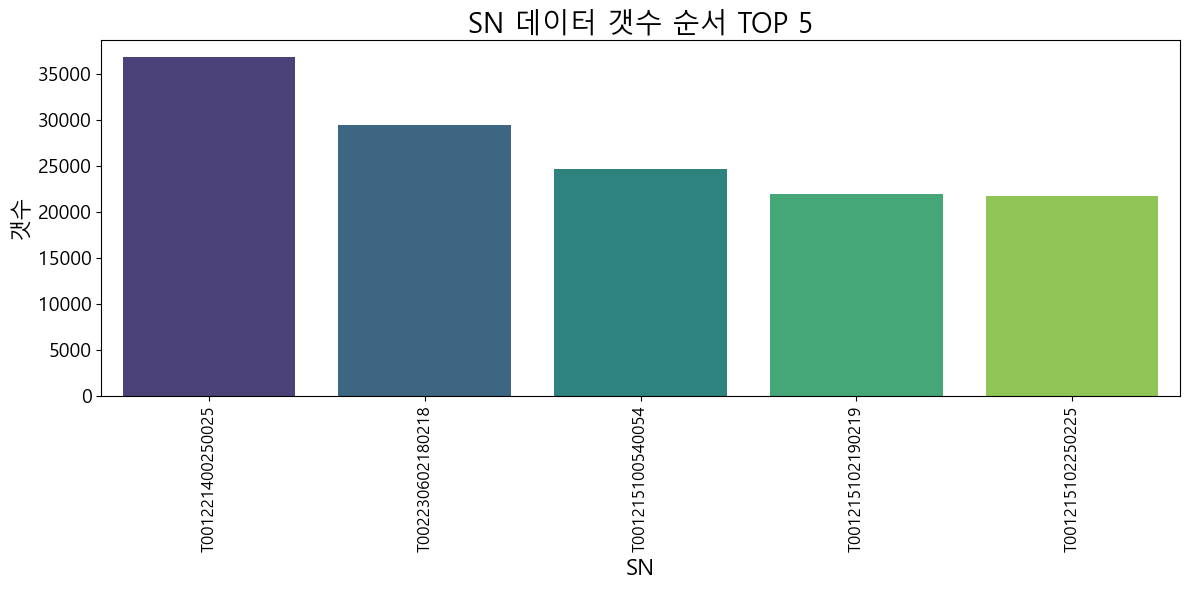

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv")

# 'SN' 칼럼의 값 빈도수 계산 및 상위 10개 선택
sn_counts = db['SN'].value_counts().head(5)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=sn_counts.index, y=sn_counts.values, palette="viridis")

# 그래프 제목 및 레이블 설정
plt.title('SN 데이터 갯수 순서 TOP 5', fontsize=20)
plt.xlabel('SN', fontsize=16)
plt.ylabel('갯수', fontsize=16,)
plt.xticks(rotation=90, fontsize=12)  # 라벨을 45도 회전
plt.yticks(fontsize=14)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


In [24]:
import pandas as pd

# 데이터 읽기
db = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\TS130_냉각수_이슈.csv")
wea = pd.read_csv(r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\기상청데이터.csv")

# '일시' 칼럼 형식을 'YYYYMMDD' 형식으로 변환
wea['일시'] = pd.to_datetime(wea['일시'], format='%Y%m%d')

# 'TTime_group'을 문자열로 변환
db['TTime_group'] = db['TTime_group'].astype(str)

# '일시' 칼럼을 문자열로 변환
wea['일시'] = wea['일시'].dt.strftime('%Y%m%d')

# 병합할 칼럼 목록
columns_to_merge = [
    '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
    '최대 풍속(m/s)', '평균 증기압(hPa)', '합계 일사량(MJ/m2)', 
    '평균 전운량(1/10)', '평균 지면온도(°C)'
]

# 'TTime_group' 칼럼과 '일시' 칼럼을 기준으로 병합 (merge)
merged_df = pd.merge(db, wea[['일시'] + columns_to_merge], left_on='TTime_group', right_on='일시', how='left')

# '일시' 칼럼 제거
merged_df = merged_df.drop(columns=['일시'])

# Target 칼럼을 마지막으로 이동
if 'Target' in merged_df.columns:
    target_column = merged_df.pop('Target')
    merged_df['Target'] = target_column

# 최종 CSV 파일로 저장
save_path = r"C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv"
merged_df.to_csv(save_path, index=False, encoding='utf-8-sig')

print(f"파일이 저장되었습니다: {save_path}")

파일이 저장되었습니다: C:\Users\sony6\Downloads\2024\2. TS130 사용 데이터\02. 전처리 데이터\최종.csv
